# **Dungeons and Dragons 5e Monster Analysis and Encounter Builder**

Created by Kaggle User Vinícius de Moraes
- Link: https://www.kaggle.com/code/vinciusdemoraes/dnd-5e-monsters-analysis-and-encounter-builder/notebook

## **1. Data collection and loading**


### **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sys import exit

### **Loading the dataset**

In [2]:
df = pd.read_csv('/kaggle/input/dungeons-and-dragons-5e-monsters/Dd5e_monsters.csv')

In [3]:
df.head()

,Name,Size,Race + alignment,HP,Armor,Speed,Challenge rating (XP)
0,Aboleth,Large,"aberration, Lawful Evil",135 (18d10+36),17 (Natural Armor),"10 ft., swim 40 ft.","10 (5,900 XP)"
1,Acolyte,Medium,"humanoid (any race), Any Alignment",9 (2d8),10,30 ft.,1/4 (50 XP)
2,Adult Black Dragon,Huge,"dragon, Chaotic Evil",195 (17d12+85),19 (Natural Armor),"40 ft., fly 80 ft., swim 40 ft.","14 (11,500 XP)"
3,Adult Blue Dragon,Huge,"dragon, Lawful Evil",225 (18d12+108),19,"40 ft., burrow 30 ft., fly 80 ft.","16 (15,000 XP)"
4,Adult Brass Dragon,Huge,"dragon, Chaotic Good",172 (15d12+75),18 (Natural Armor),"40 ft., burrow 40 ft., fly 80 ft.","13 (10,000 XP)"


In [4]:
df.columns

Index(['Name', 'Size', 'Race + alignment', 'HP', 'Armor', 'Speed',
       'Challenge rating  (XP)'],
      dtype='object')

In [5]:
df.shape

(324, 7)

## **2. Exploratory Data Analysis (EDA)**

Text(0.5, 1.0, 'Frequency of monsters by challenge rating')

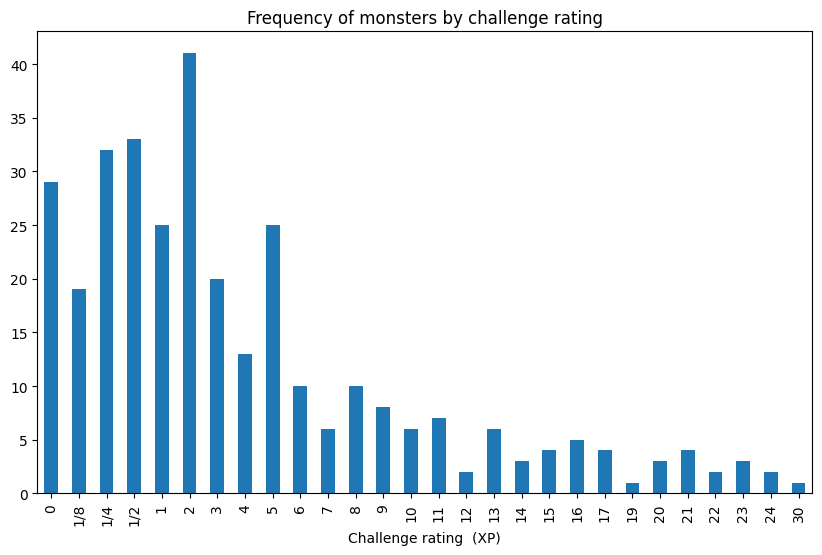

In [6]:
# @title **Challenge rating distribution**

data = df['Challenge rating  (XP)'].str.split('(').str[0]
data = data.str.replace('1/2', '0.5')
data = data.str.replace('1/4', '0.25')
data = data.str.replace('1/8', '0.125')
data = data.astype(float)
data = data.sort_values()
data = data.astype(str)
data = data.str.replace('0.5', '1/2')
data = data.str.replace('0.25', '1/4')
data = data.str.replace('0.125', '1/8')
data = data.str.replace('.0', '')

plt.figure(figsize=(10,6))
data.value_counts()[data.unique()].plot(kind='bar')
plt.title("Frequency of monsters by challenge rating")

Text(0.5, 1.0, 'Monster size distribution')

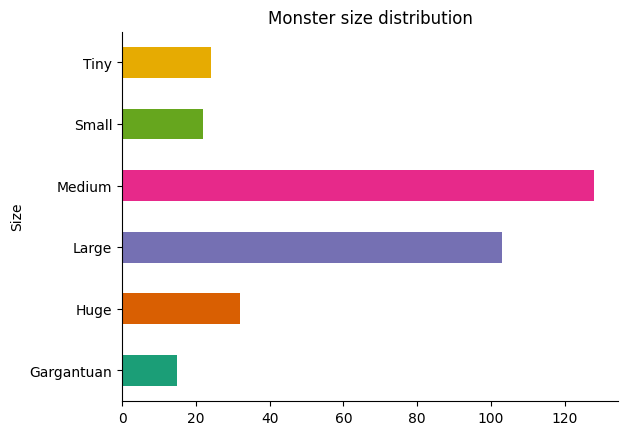

In [7]:
# @title **Size distribution**

df.groupby('Size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Monster size distribution")

Text(0.5, 1.0, 'Alignment distribution')

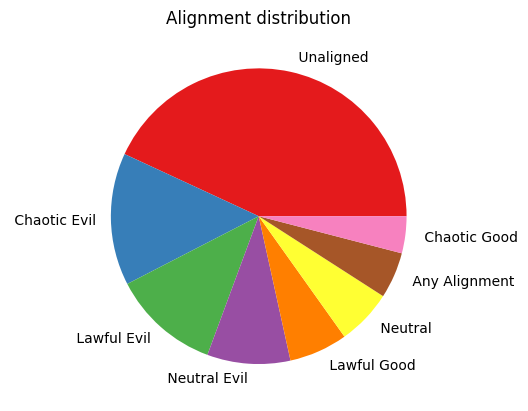

In [8]:
# @title **Alignment distribution**
data = df['Race + alignment'].apply(lambda x: x.split(',')[1].split(' (')[0])
data = data.value_counts()
data = data[data > 6]
plt.pie(data, labels=data.index, colors=sns.palettes.mpl_palette('Set1', 8))
plt.title("Alignment distribution")

Text(0.5, 1.0, 'Average HP per race')

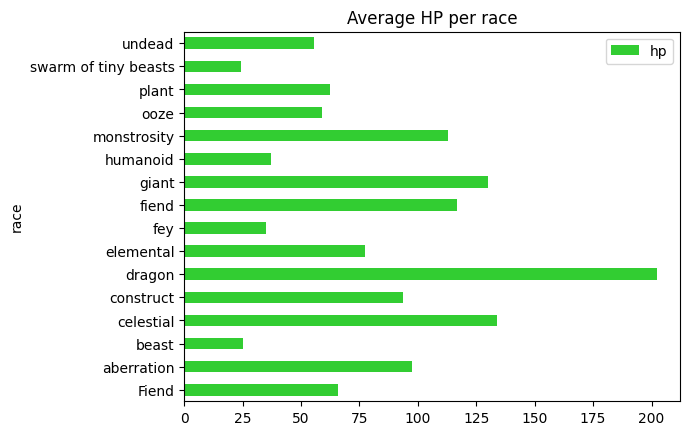

In [9]:
# @title **HP per monster type**

hp = df['HP'].apply(lambda x: int(x.split(' (')[0]))
monster_type = df['Race + alignment'].apply(lambda x: x.split(',')[0].split(' (')[0])
race_hp = pd.DataFrame({'hp': hp, 'race': monster_type})
mean_race_hp = race_hp.groupby(['race']).mean()

mean_race_hp.plot(kind='barh', color='limegreen')
plt.title('Average HP per race')

Text(0.5, 1.0, 'Average AC per race')

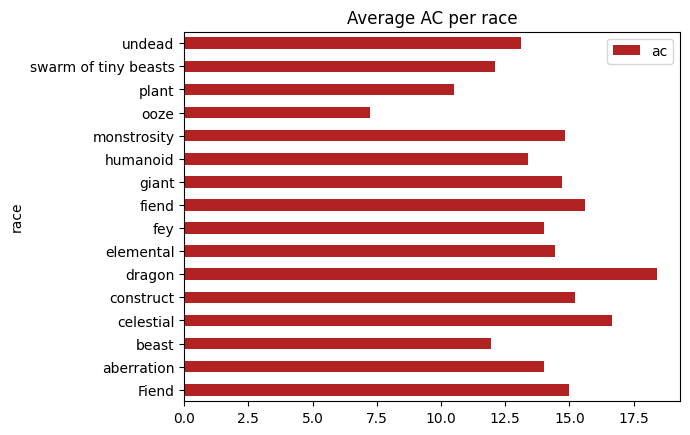

In [10]:
# @title **AC per monster type**

ac = df['Armor'].apply(lambda x: int(x.split(' (')[0]))
monster_type = df['Race + alignment'].apply(lambda x: x.split(',')[0].split(' (')[0])
race_ac = pd.DataFrame({'ac': ac, 'race': monster_type})
mean_race_ac = race_ac.groupby(['race']).mean()

mean_race_ac.plot(kind='barh', color='firebrick')
plt.title('Average AC per race')

## **3. Feature Engineering**

In [11]:
# @title **Fixing the columns**
df['Race'] = df['Race + alignment'].apply(lambda x: x.split(',')[0].split(' (')[0])
df['Alignment'] = df['Race + alignment'].apply(lambda x: x.split(',')[1].split(' (')[0])
df['HP'] = df['HP'].apply(lambda x: int(x.split(' (')[0]))
df['Armor'] = df['Armor'].apply(lambda x: int(x.split(' (')[0]))
df['Challenge Rating'] = df['Challenge rating  (XP)'].apply(lambda x: float(x.split(' (')[0]) if '/' not in x else float(eval(x.split(' (')[0])))
df['XP'] = df['Challenge rating  (XP)'].apply(lambda x: int(x.split('(')[1].split(' XP')[0].replace(',','')))
df = df.drop(['Race + alignment', 'Challenge rating  (XP)'],axis=1)
df

,Name,Size,HP,Armor,Speed,Race,Alignment,Challenge Rating,XP
0,Aboleth,Large,135,17,"10 ft., swim 40 ft.",aberration,Lawful Evil,10.00,5900
1,Acolyte,Medium,9,10,30 ft.,humanoid,Any Alignment,0.25,50
2,Adult Black Dragon,Huge,195,19,"40 ft., fly 80 ft., swim 40 ft.",dragon,Chaotic Evil,14.00,11500
3,Adult Blue Dragon,Huge,225,19,"40 ft., burrow 30 ft., fly 80 ft.",dragon,Lawful Evil,16.00,15000
4,Adult Brass Dragon,Huge,172,18,"40 ft., burrow 40 ft., fly 80 ft.",dragon,Chaotic Good,13.00,10000
...,...,...,...,...,...,...,...,...,...
319,Young Green Dragon,Large,136,18,"40 ft., fly 80 ft., swim 40 ft.",dragon,Lawful Evil,8.00,3900
320,Young Red Dragon,Large,178,18,"40 ft., climb 40 ft., fly 80 ft.",dragon,Chaotic Evil,10.00,5900
321,Young Silver Dragon,Large,168,18,"40 ft., fly 80 ft.",dragon,Lawful Good,9.00,5000
322,Young White Dragon,Large,133,17,"40 ft., burrow 20 ft., fly 80 ft., swim 40 ft.",dragon,Chaotic Evil,6.00,2300


In [12]:
# @title **Checking for missing values**

df.isna().sum()

Name                0
Size                0
HP                  0
Armor               0
Speed               0
Race                0
Alignment           0
Challenge Rating    0
XP                  0
dtype: int64

In [13]:
# @title **Making the XP threshold table**

difficulties = ["Easy", "Medium", "Hard", "Deadly"]

xp_budgets = {
    1: {1: 25, 2: 50, 3: 75, 4: 100},
    2: {1: 50, 2: 100, 3: 150, 4: 200},
    3: {1: 75, 2: 150, 3: 225, 4: 400},
    4: {1: 125, 2: 250, 3: 375, 4: 500},
    5: {1: 250, 2: 500, 3: 750, 4: 1100},
    6: {1: 300, 2: 600, 3: 900, 4: 1400},
    7: {1: 350, 2: 750, 3: 1100, 4: 1700},
    8: {1: 450, 2: 900, 3: 1400, 4: 2100},
    9: {1: 550, 2: 1100, 3: 1600, 4: 2400},
    10: {1: 600, 2: 1200, 3: 1900, 4: 2800},
    11: {1: 800, 2: 1600, 3: 2400, 4: 3600},
    12: {1: 1000, 2: 2000, 3: 3000, 4: 4500},
    13: {1: 1100, 2: 2200, 3: 3400, 4: 5100},
    14: {1: 1250, 2: 2500, 3: 3800, 4: 5700},
    15: {1: 1400, 2: 2800, 3: 4300, 4: 6400},
    16: {1: 1600, 2: 3200, 3: 4800, 4: 7200},
    17: {1: 2000, 2: 3900, 3: 5900, 4: 8800},
    18: {1: 2100, 2: 4200, 3: 6300, 4: 9500},
    19: {1: 2400, 2: 4900, 3: 7300, 4: 10900},
    20: {1: 2800, 2: 5700, 3: 8500, 4: 12700}
}

xp_table = pd.DataFrame.from_dict(xp_budgets, orient='index')

xp_table.index.name = 'Character Level'
xp_table.columns = difficulties

xp_table

,Easy,Medium,Hard,Deadly
Character Level,,,,
1,25,50,75,100
2,50,100,150,200
3,75,150,225,400
4,125,250,375,500
5,250,500,750,1100
6,300,600,900,1400
7,350,750,1100,1700
8,450,900,1400,2100
9,550,1100,1600,2400


## **4. Encounter builder**

In [ ]:
# @title **D&D encounter calculator**

# Uncomment to use

n_players = int(input("How many players do you have? "))
player_levels = []

for i in range(0, n_players):
  player_levels.append(int(input(f"Level of player {i+1}: ")))

n_monsters = int(input("How many monsters? "))
monsters_name = []

for i in range(0, n_monsters):
  monsters_name.append(input(f"Name of monster {i+1}: ").rstrip())

xp_easy = 0
xp_medium = 0
xp_hard = 0
xp_deadly = 0

# Calculating XP threshold
for i in range(0,n_players):
  xp_easy = xp_easy + xp_table['Easy'][player_levels[i]]
  xp_medium = xp_medium + xp_table['Medium'][player_levels[i]]
  xp_hard = xp_hard + xp_table['Hard'][player_levels[i]]
  xp_deadly = xp_deadly + xp_table['Deadly'][player_levels[i]]

# Encounter against 1 monster
if(n_monsters == 1):
  if((df['Name'] == monsters_name[0]).sum() != 0):
    if(df.loc[df['Name'] == monsters_name[0], 'XP'].values[0] <= xp_easy):
      print(f"The encounter is easy — its XP value of {df.loc[df['Name'] == monsters_name[0], 'XP'].values[0]} XP is lower than the party's Easy threshold of {xp_easy} XP.")
    elif((df.loc[df['Name'] == monsters_name[0], 'XP'].values[0] >= xp_medium) and (df.loc[df['Name'] == monsters_name[0], 'XP'].values[0] < xp_hard)):
      print(f"The encounter is medium — its XP value of {df.loc[df['Name'] == monsters_name[0], 'XP'].values[0]} XP is higher than the party's Medium threshold of {xp_medium} XP.")
    elif((df.loc[df['Name'] == monsters_name[0], 'XP'].values[0] >= xp_hard) and (df.loc[df['Name'] == monsters_name[0], 'XP'].values[0] < xp_deadly)):
      print(f"The encounter is hard — its XP value of {df.loc[df['Name'] == monsters_name[0], 'XP'].values[0]} XP is higher than the party's Hard threshold of {xp_hard} XP.")
    elif(df.loc[df['Name'] == monsters_name[0], 'XP'].values[0] >= xp_deadly):
      print(f"The encounter is deadly — its XP value of {df.loc[df['Name'] == monsters_name[0], 'XP'].values[0]} XP is higher than the party's Deadly threshold of {xp_deadly} XP.")
  else:
    print("This monster does not exist!")

monsters_xp = 0

# Encounter against 2 monsters
if(n_monsters == 2):
  for i in range(0, n_monsters):
    if((df['Name'] == monsters_name[i]).sum() != 0):
      monsters_xp = monsters_xp + df.loc[df['Name'] == monsters_name[i], 'XP'].values[0]
    else:
      print(f"The monster {i+1} does not exist!")
      exit(0)
  monsters_xp = monsters_xp*1.5
  if(monsters_xp <= xp_easy):
    print(f"The encounter is easy — its XP value of {monsters_xp} XP is lower than the party's Easy threshold of {xp_easy} XP.")
  elif((monsters_xp >= xp_medium) and (monsters_xp < xp_hard)):
    print(f"The encounter is medium — its XP value of {monsters_xp} XP is higher than the party's Medium threshold of {xp_medium} XP.")
  elif((monsters_xp >= xp_hard) and (monsters_xp < xp_deadly)):
    print(f"The encounter is hard — its XP value of {monsters_xp} XP is higher than the party's Hard threshold of {xp_hard} XP.")
  elif(monsters_xp >= xp_deadly):
    print(f"The encounter is deadly — its XP value of {monsters_xp} XP is higher than the party's Deadly threshold of {xp_deadly} XP.")

# Encounter against 3-6 monsters
if(n_monsters >=3 and n_monsters <= 6):
  for i in range(0, n_monsters):
    if((df['Name'] == monsters_name[i]).sum() != 0):
      monsters_xp = monsters_xp + df.loc[df['Name'] == monsters_name[i], 'XP'].values[0]
    else:
      print(f"The monster {i+1} does not exist!")
      exit(0)
  monsters_xp = monsters_xp*2
  if(monsters_xp <= xp_easy):
    print(f"The encounter is easy — its XP value of {monsters_xp} XP is lower than the party's Easy threshold of {xp_easy} XP.")
  elif((monsters_xp >= xp_medium) and (monsters_xp < xp_hard)):
    print(f"The encounter is medium — its XP value of {monsters_xp} XP is higher than the party's Medium threshold of {xp_medium} XP.")
  elif((monsters_xp >= xp_hard) and (monsters_xp < xp_deadly)):
    print(f"The encounter is hard — its XP value of {monsters_xp} XP is higher than the party's Hard threshold of {xp_hard} XP.")
  elif(monsters_xp >= xp_deadly):
    print(f"The encounter is deadly — its XP value of {monsters_xp} XP is higher than the party's Deadly threshold of {xp_deadly} XP.")

# Encounter against 7-10 monsters
if(n_monsters >=7 and n_monsters <= 10):
  for i in range(0, n_monsters):
    if((df['Name'] == monsters_name[i]).sum() != 0):
      monsters_xp = monsters_xp + df.loc[df['Name'] == monsters_name[i], 'XP'].values[0]
    else:
      print(f"The monster {i+1} does not exist!")
      exit(0)
  monsters_xp = monsters_xp*2.5
  if(monsters_xp <= xp_easy):
    print(f"The encounter is easy — its XP value of {monsters_xp} XP is lower than the party's Easy threshold of {xp_easy} XP.")
  elif((monsters_xp >= xp_medium) and (monsters_xp < xp_hard)):
    print(f"The encounter is medium — its XP value of {monsters_xp} XP is higher than the party's Medium threshold of {xp_medium} XP.")
  elif((monsters_xp >= xp_hard) and (monsters_xp < xp_deadly)):
    print(f"The encounter is hard — its XP value of {monsters_xp} XP is higher than the party's Hard threshold of {xp_hard} XP.")
  elif(monsters_xp >= xp_deadly):
    print(f"The encounter is deadly — its XP value of {monsters_xp} XP is higher than the party's Deadly threshold of {xp_deadly} XP.")

# Encounter against 11-14 monsters
if(n_monsters >=11 and n_monsters <= 14):
  for i in range(0, n_monsters):
    if((df['Name'] == monsters_name[i]).sum() != 0):
      monsters_xp = monsters_xp + df.loc[df['Name'] == monsters_name[i], 'XP'].values[0]
    else:
      print(f"The monster {i+1} does not exist!")
      exit(0)
  monsters_xp = monsters_xp*3
  if(monsters_xp <= xp_easy):
    print(f"The encounter is easy — its XP value of {monsters_xp} XP is lower than the party's Easy threshold of {xp_easy} XP.")
  elif((monsters_xp >= xp_medium) and (monsters_xp < xp_hard)):
    print(f"The encounter is medium — its XP value of {monsters_xp} XP is higher than the party's Medium threshold of {xp_medium} XP.")
  elif((monsters_xp >= xp_hard) and (monsters_xp < xp_deadly)):
    print(f"The encounter is hard — its XP value of {monsters_xp} XP is higher than the party's Hard threshold of {xp_hard} XP.")
  elif(monsters_xp >= xp_deadly):
    print(f"The encounter is deadly — its XP value of {monsters_xp} XP is higher than the party's Deadly threshold of {xp_deadly} XP.")

# Encounter against 15 or more monsters
if(n_monsters >=15):
  for i in range(0, n_monsters):
    if((df['Name'] == monsters_name[i]).sum() != 0):
      monsters_xp = monsters_xp + df.loc[df['Name'] == monsters_name[i], 'XP'].values[0]
    else:
      print(f"The monster {i+1} does not exist!")
      exit(0)
  monsters_xp = monsters_xp*4
  if(monsters_xp <= xp_easy):
    print(f"The encounter is easy — its XP value of {monsters_xp} XP is lower than the party's Easy threshold of {xp_easy} XP.")
  elif((monsters_xp >= xp_medium) and (monsters_xp < xp_hard)):
    print(f"The encounter is medium — its XP value of {monsters_xp} XP is higher than the party's Medium threshold of {xp_medium} XP.")
  elif((monsters_xp >= xp_hard) and (monsters_xp < xp_deadly)):
    print(f"The encounter is hard — its XP value of {monsters_xp} XP is higher than the party's Hard threshold of {xp_hard} XP.")
  elif(monsters_xp >= xp_deadly):
    print(f"The encounter is deadly — its XP value of {monsters_xp} XP is higher than the party's Deadly threshold of {xp_deadly} XP.")


'\nn_players = int(input("How many players do you have? "))\nplayer_levels = []\n\nfor i in range(0, n_players):\n  player_levels.append(int(input(f"Level of player {i+1}: ")))\n\nn_monsters = int(input("How many monsters? "))\nmonsters_name = []\n\nfor i in range(0, n_monsters):\n  monsters_name.append(input(f"Name of monster {i+1}: ").rstrip())\n\nxp_easy = 0\nxp_medium = 0\nxp_hard = 0\nxp_deadly = 0\n\n# Calculating XP threshold\nfor i in range(0,n_players):\n  xp_easy = xp_easy + xp_table[\'Easy\'][player_levels[i]]\n  xp_medium = xp_medium + xp_table[\'Medium\'][player_levels[i]]\n  xp_hard = xp_hard + xp_table[\'Hard\'][player_levels[i]]\n  xp_deadly = xp_deadly + xp_table[\'Deadly\'][player_levels[i]]\n\n# Encounter against 1 monster\nif(n_monsters == 1):\n  if((df[\'Name\'] == monsters_name[0]).sum() != 0):\n    if(df.loc[df[\'Name\'] == monsters_name[0], \'XP\'].values[0] <= xp_easy):\n      print(f"The encounter is easy — its XP value of {df.loc[df[\'Name\'] == monsters_name